In [ ]:
# importing all necessary libraries

import numpy as np # linear algebra

import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sns #for visualization

import matplotlib.pyplot as plt #for visualization

In [ ]:
# Importing the training dataset
flight_df=pd.read_excel('Data_Train.xlsx')
flight_df.head()


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [ ]:
flight_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB



So, we have 10 object datatype columns and only one int. In order to use these columns for predicition purposes, we will need to encode them. But first, let's see if we have any null values

In [ ]:
flight_df['Price'].describe()

count    10683.000000
mean      9087.064121
std       4611.359167
min       1759.000000
25%       5277.000000
50%       8372.000000
75%      12373.000000
max      79512.000000
Name: Price, dtype: float64

In [ ]:
flight_df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

Since, we have only one null value in destination and total_stops, we'll just discard them


In [ ]:
flight_df.dropna(inplace=True)

In [ ]:
flight_df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [ ]:
flight_df[flight_df.duplicated()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
683,Jet Airways,1/06/2019,Delhi,Cochin,DEL → NAG → BOM → COK,14:35,04:25 02 Jun,13h 50m,2 stops,No info,13376
1061,Air India,21/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,22:00,19:15 22 May,21h 15m,2 stops,No info,10231
1348,Air India,18/05/2019,Delhi,Cochin,DEL → HYD → BOM → COK,17:15,19:15 19 May,26h,2 stops,No info,12392
1418,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,05:30,04:25 07 Jun,22h 55m,2 stops,In-flight meal not included,10368
1674,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,18:25,21:20,2h 55m,non-stop,No info,7303
...,...,...,...,...,...,...,...,...,...,...,...
10594,Jet Airways,27/06/2019,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,12:35 28 Jun,13h 30m,2 stops,No info,12819
10616,Jet Airways,1/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,09:40,12:35 02 Jun,26h 55m,2 stops,No info,13014
10634,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,09:40,12:35 07 Jun,26h 55m,2 stops,In-flight meal not included,11733
10672,Jet Airways,27/06/2019,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,19:00 28 Jun,19h 55m,2 stops,In-flight meal not included,11150


there are 220 duplicate rows. Before proceeding forward, we'll remove them. Also, Delhi and New Delhi are same, so I'll be renaming Delhi to New Delhi and check for duplicates again.


In [ ]:

flight_df['Source'] = flight_df['Source'].replace({'Delhi': 'New Delhi'})
flight_df['Destination'] = flight_df['Destination'].replace({'Delhi': 'New Delhi'})


In [ ]:
# Removing all duplicates
flight_df.drop_duplicates(keep=False, inplace=True)

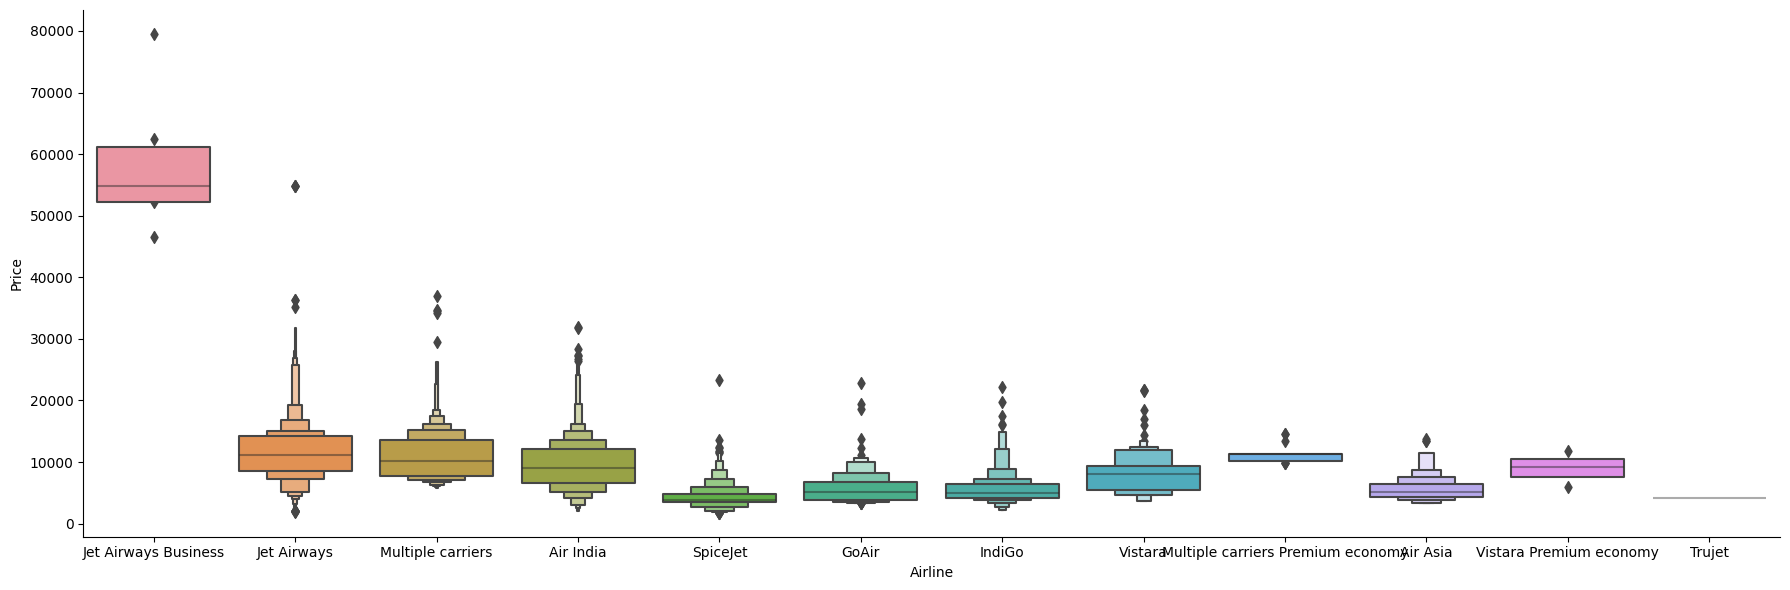

In [ ]:
# Lets visualize boxplots to see how price is getting varied with the factors
#airline vs price
sns.catplot(y = "Price", x = "Airline", data = flight_df.sort_values("Price", ascending = False),kind="boxen", height = 6, aspect = 3)
plt.show()

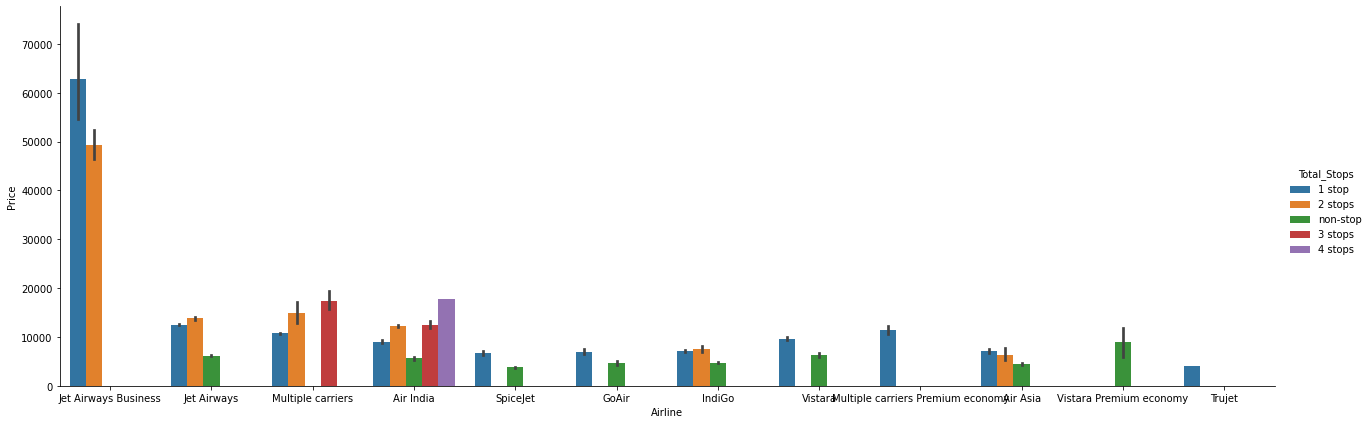

In [ ]:
#airline vs total stops
sns.catplot(y = "Price", x = "Airline", data = flight_df.sort_values("Price", ascending = False),kind="bar", hue='Total_Stops',height = 6, aspect = 3)
plt.show()

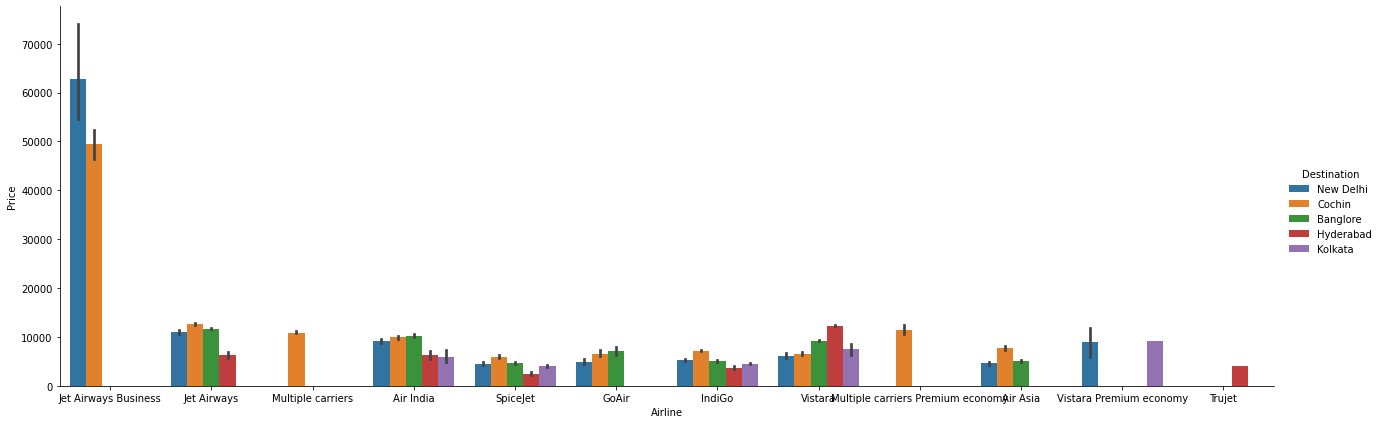

In [ ]:
sns.catplot(y = "Price", x = "Airline", data = flight_df.sort_values("Price", ascending = False),kind="bar", hue='Destination',height = 6, aspect = 3)
plt.show()


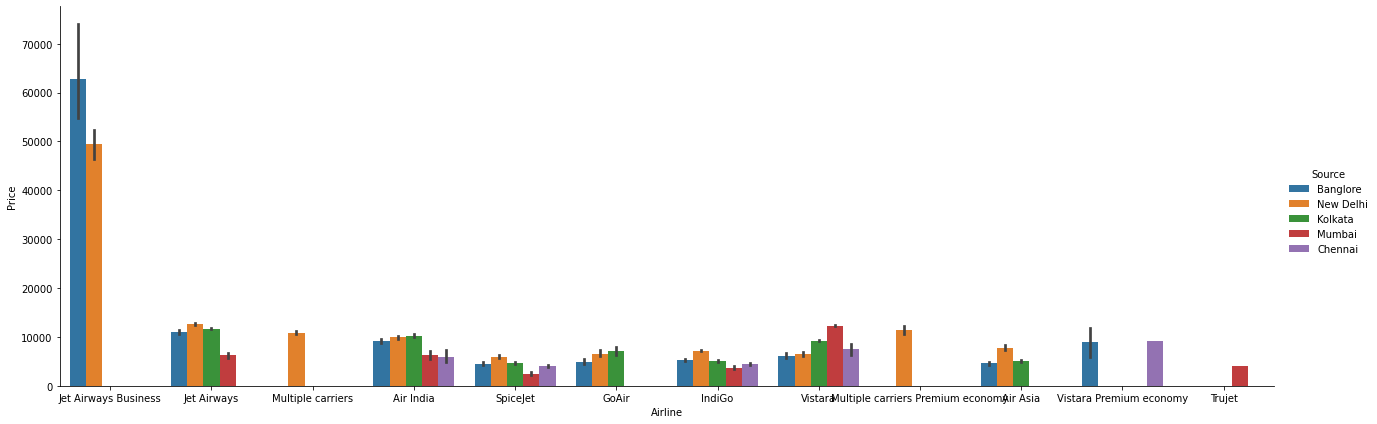

In [ ]:
sns.catplot(y = "Price", x = "Airline", data = flight_df.sort_values("Price", ascending = False),kind="bar", hue='Source',height = 6, aspect = 3)
plt.show()

In [ ]:

flight_df['source_destination']=flight_df['Source']+'-'+flight_df['Destination']
flight_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,source_destination
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,Banglore-New Delhi
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,Kolkata-Banglore
2,Jet Airways,9/06/2019,New Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,New Delhi-Cochin
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,Kolkata-Banglore
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,Banglore-New Delhi


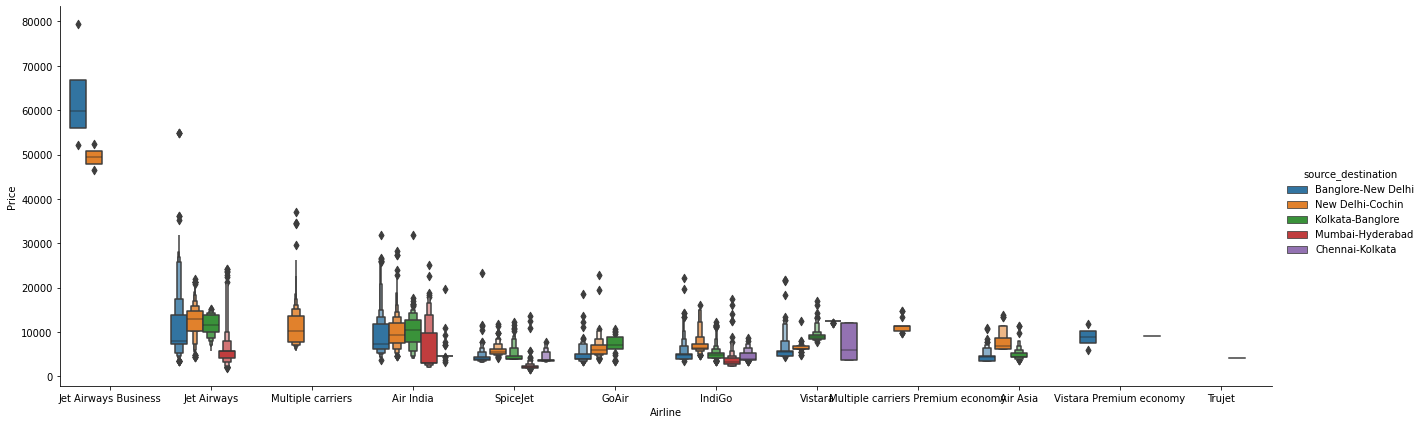

In [ ]:

sns.catplot(y = "Price", x = "Airline", data = flight_df.sort_values("Price", ascending = False),kind="boxen", hue='source_destination',height = 6, aspect = 3)
plt.show()

In [ ]:
# convert date related columns to datetime format like date_journey, Dep_Time etc
# Date_of_Journey
flight_df["Journey_day"] = pd.to_datetime(flight_df.Date_of_Journey, format="%d/%m/%Y").dt.day
flight_df["Journey_month"] = pd.to_datetime(flight_df["Date_of_Journey"], format = "%d/%m/%Y").dt.month
flight_df.drop(["Date_of_Journey"], axis = 1, inplace = True)

# Dep_Time
flight_df["Dep_hour"] = pd.to_datetime(flight_df["Dep_Time"]).dt.hour
flight_df["Dep_min"] = pd.to_datetime(flight_df["Dep_Time"]).dt.minute
flight_df.drop(["Dep_Time"], axis = 1, inplace = True)

# Arrival_Time
flight_df["Arrival_hour"] = pd.to_datetime(flight_df.Arrival_Time).dt.hour
flight_df["Arrival_min"] = pd.to_datetime(flight_df.Arrival_Time).dt.minute
flight_df.drop(["Arrival_Time"], axis = 1, inplace = True)

In [ ]:
# Duration

duration=list(flight_df['Duration']) # convertion duration coulmn to list to sepearte hours and min

for i in range(len(duration)):
    if duration[i].split()!=2:
        if 'h' in duration[i]:
            duration[i]= duration[i].strip()+' 0m'
            
        else:
            duration[i]= '0h '+ duration[i]

duration_hr=[]
duration_min=[]

for i in range(len(duration)):
    duration_hr.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_min.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

flight_df.drop(["Duration"], axis = 1, inplace = True)


In [ ]:
flight_df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,New Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35


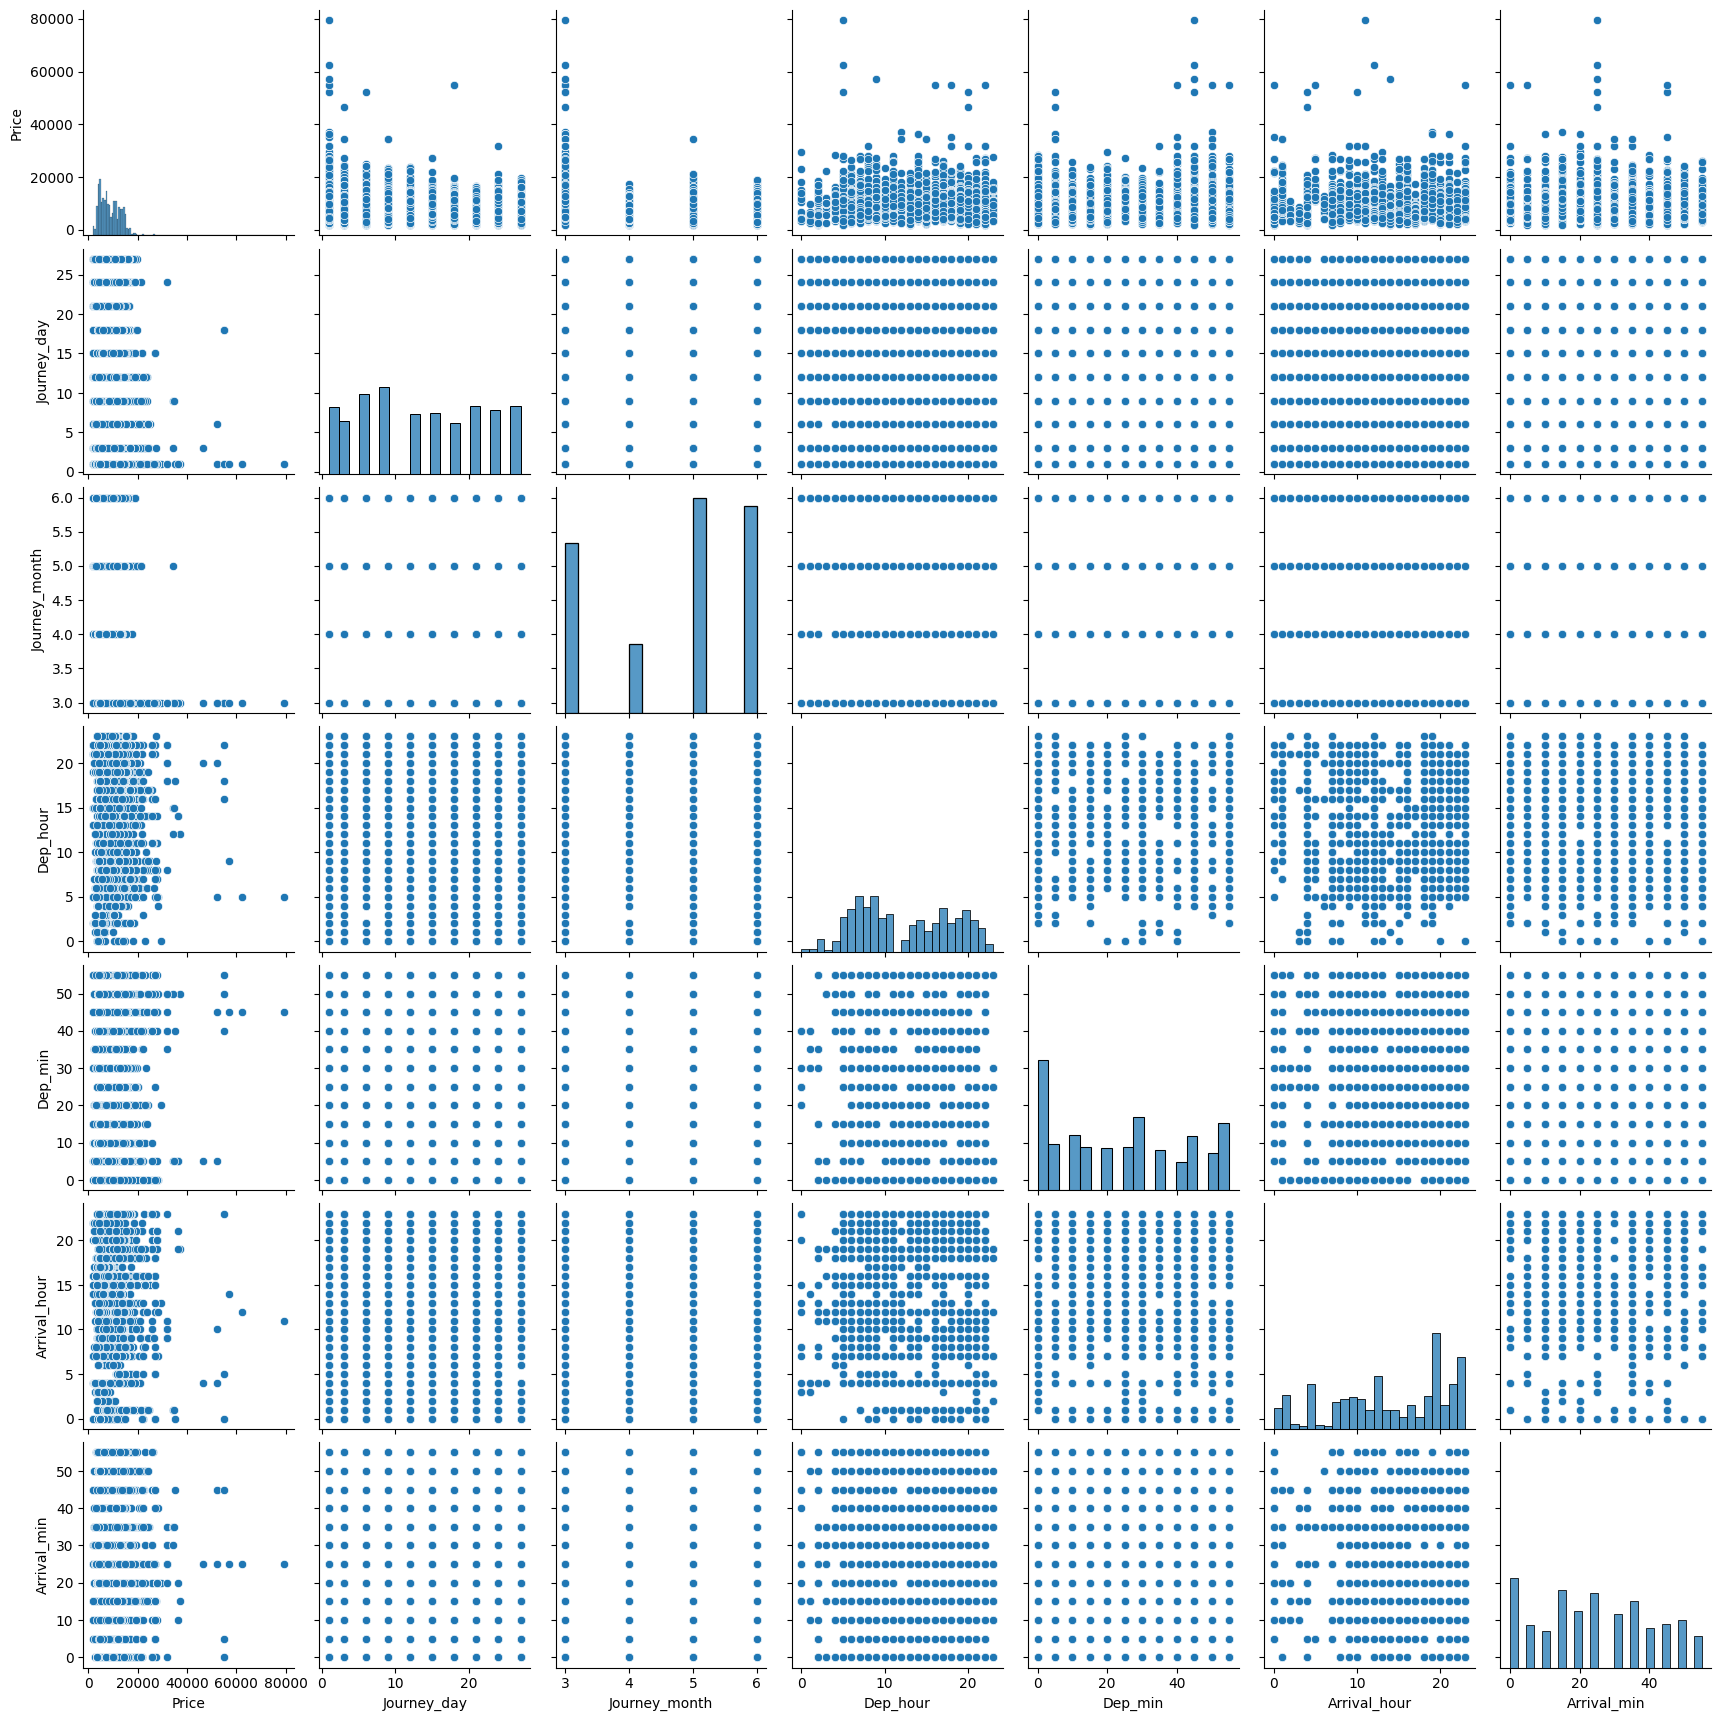

In [ ]:
sns.pairplot(flight_df)

Since we have the duration and total stops, we can drop the route column

In [ ]:
# droppping route and source_destination
flight_df.drop(['Route'],axis=1,inplace=True)
flight_df.drop(['source_destination'],axis=1,inplace=True)


KeyError: ignored

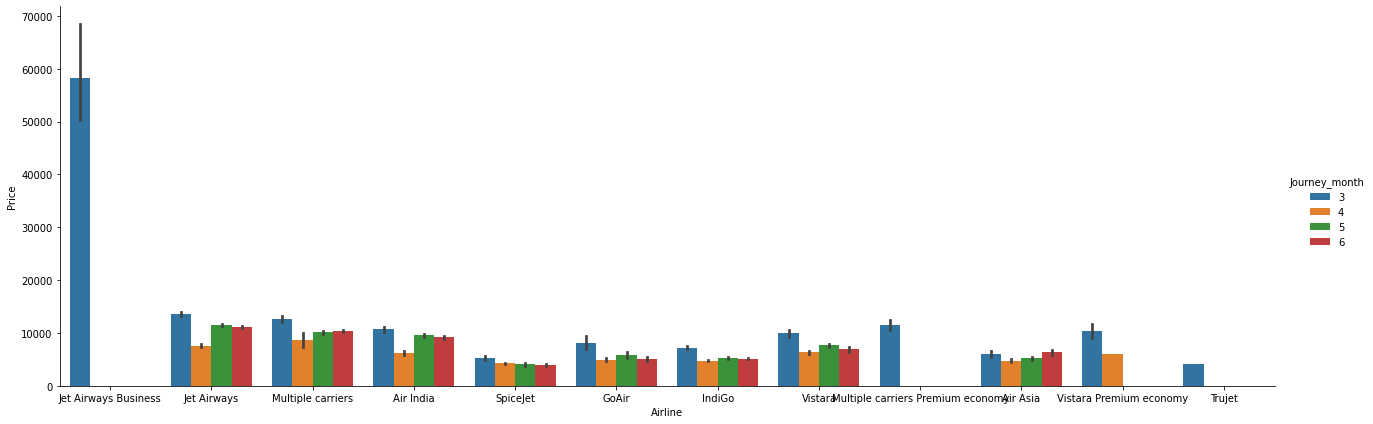

In [ ]:

sns.catplot(y = "Price", x = "Airline", data = flight_df.sort_values("Price", ascending = False),kind="bar", hue='Journey_month',height = 6, aspect = 3)
plt.show()

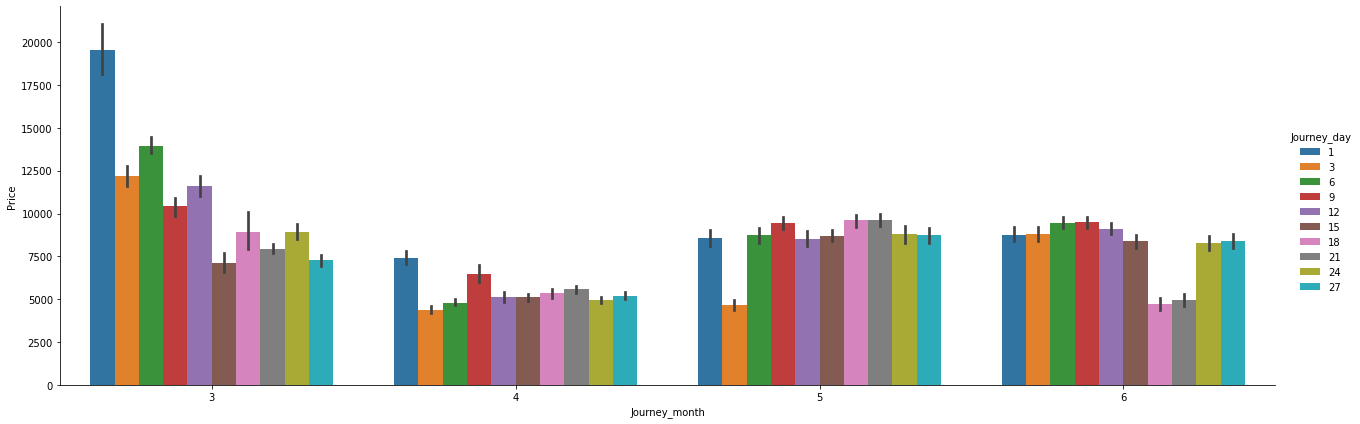

In [ ]:
sns.catplot(y = "Price", x = "Journey_month", data = flight_df.sort_values("Price", ascending = False),kind="bar", hue='Journey_day',height = 6, aspect = 3)
plt.show()

From the above analysis, following observations could be drawn:


*   Maximum price is for Jet airways business flights
*   Majority of the flights with one stops have are more expensive 

*   All flights prices seem to be maximum in the month of march
*   Also, prices are higher for flights flying on the 1st day of the month








In [ ]:
# There are 6 categorical variables described below:
flight_df['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [ ]:
flight_df['Source'].unique()

array(['Banglore', 'Kolkata', 'New Delhi', 'Chennai', 'Mumbai'],
      dtype=object)

In [ ]:
flight_df['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

In [ ]:
flight_df['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [ ]:
flight_df['Additional_Info'].value_counts()/flight_df['Additional_Info'].count()

No info                         0.782994
In-flight meal not included     0.182721
No check-in baggage included    0.030778
1 Long layover                  0.001851
Change airports                 0.000682
Business class                  0.000390
No Info                         0.000292
1 Short layover                 0.000097
Red-eye flight                  0.000097
2 Long layover                  0.000097
Name: Additional_Info, dtype: float64

In [ ]:
# Almost 80% of the values contain no Info. Hence, we'll be dropping it
flight_df.drop(['Additional_Info'],axis=1,inplace=True)


In [ ]:
flight_df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [ ]:
# one-hot encoding of categorical variables
print("Airline")
print("-"*75)
print(flight_df["Airline"].value_counts())
Airline = pd.get_dummies(flight_df["Airline"], drop_first= True)

print(flight_df["Source"].value_counts())
Source = pd.get_dummies(flight_df["Source"], drop_first= True)


print(flight_df["Destination"].value_counts())
Destination = pd.get_dummies(flight_df["Destination"], drop_first = True)

Airline
---------------------------------------------------------------------------
Jet Airways                          3569
IndiGo                               2033
Air India                            1644
Multiple carriers                    1196
SpiceJet                              812
Vistara                               477
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64
New Delhi    4178
Kolkata      2850
Banglore     2161
Mumbai        697
Chennai       381
Name: Source, dtype: int64
Cochin       4178
Banglore     2850
New Delhi    2161
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64


In [ ]:
fight_df = pd.concat([flight_df, Airline, Source, Destination], axis = 1)

In [ ]:
# Replacing Total_Stops
fight_df.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)



flight_df.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,5,50,13,15
2,Jet Airways,New Delhi,Cochin,2 stops,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,1 stop,13302,1,3,16,50,21,35


In [ ]:
fight_df.drop(['Airline','Source','Destination'],axis=1,inplace=True)
flight_df.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,5,50,13,15
2,Jet Airways,New Delhi,Cochin,2 stops,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,1 stop,13302,1,3,16,50,21,35


Now that we have created our final dataset, we'll need to divide it into dependant and independant variables and do feture selection

In [ ]:
# X: indpendant variables and Y: dependant variables

X=fight_df.drop(['Price'],axis=1,inplace=False)

Y=fight_df['Price']
X.head()


,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Air India,GoAir,IndiGo,...,Vistara,Vistara Premium economy,Chennai,Kolkata,Mumbai,New Delhi,Cochin,Hyderabad,Kolkata,New Delhi
0,0,24,3,22,20,1,10,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,2,1,5,5,50,13,15,1,0,0,...,0,0,0,1,0,0,0,0,0,0
2,2,9,6,9,25,4,25,0,0,0,...,0,0,0,0,0,1,1,0,0,0
3,1,12,5,18,5,23,30,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4,1,1,3,16,50,21,35,0,0,1,...,0,0,0,0,0,0,0,0,0,1


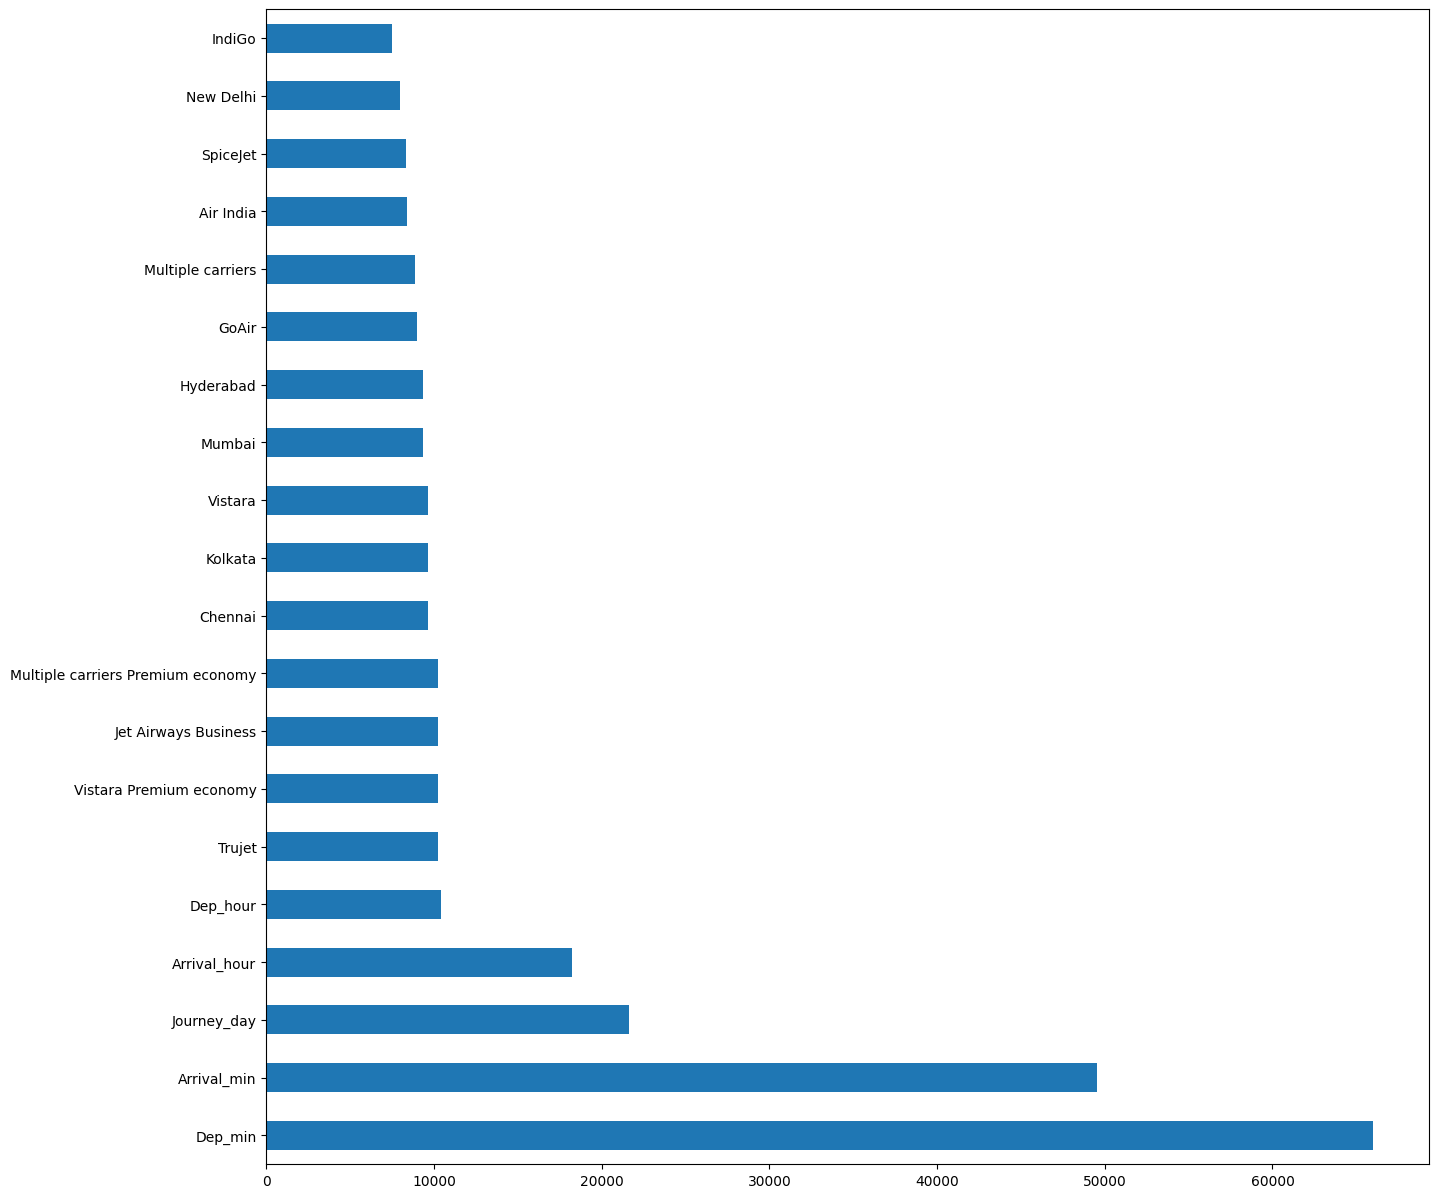

In [ ]:
# There are 3 feature selections methods we'll be exploring:
# 1. univariate analysis
# 2. correlation matrix
# 3. feature importance

# univariate analysis
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

fs=SelectKBest(score_func=chi2)  
# Applying feature selection
X_selected=fs.fit(X,Y)

# graph of features

plt.figure(figsize=(15,15))
feat_importances = pd.Series(X_selected.scores_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()


<Axes: >

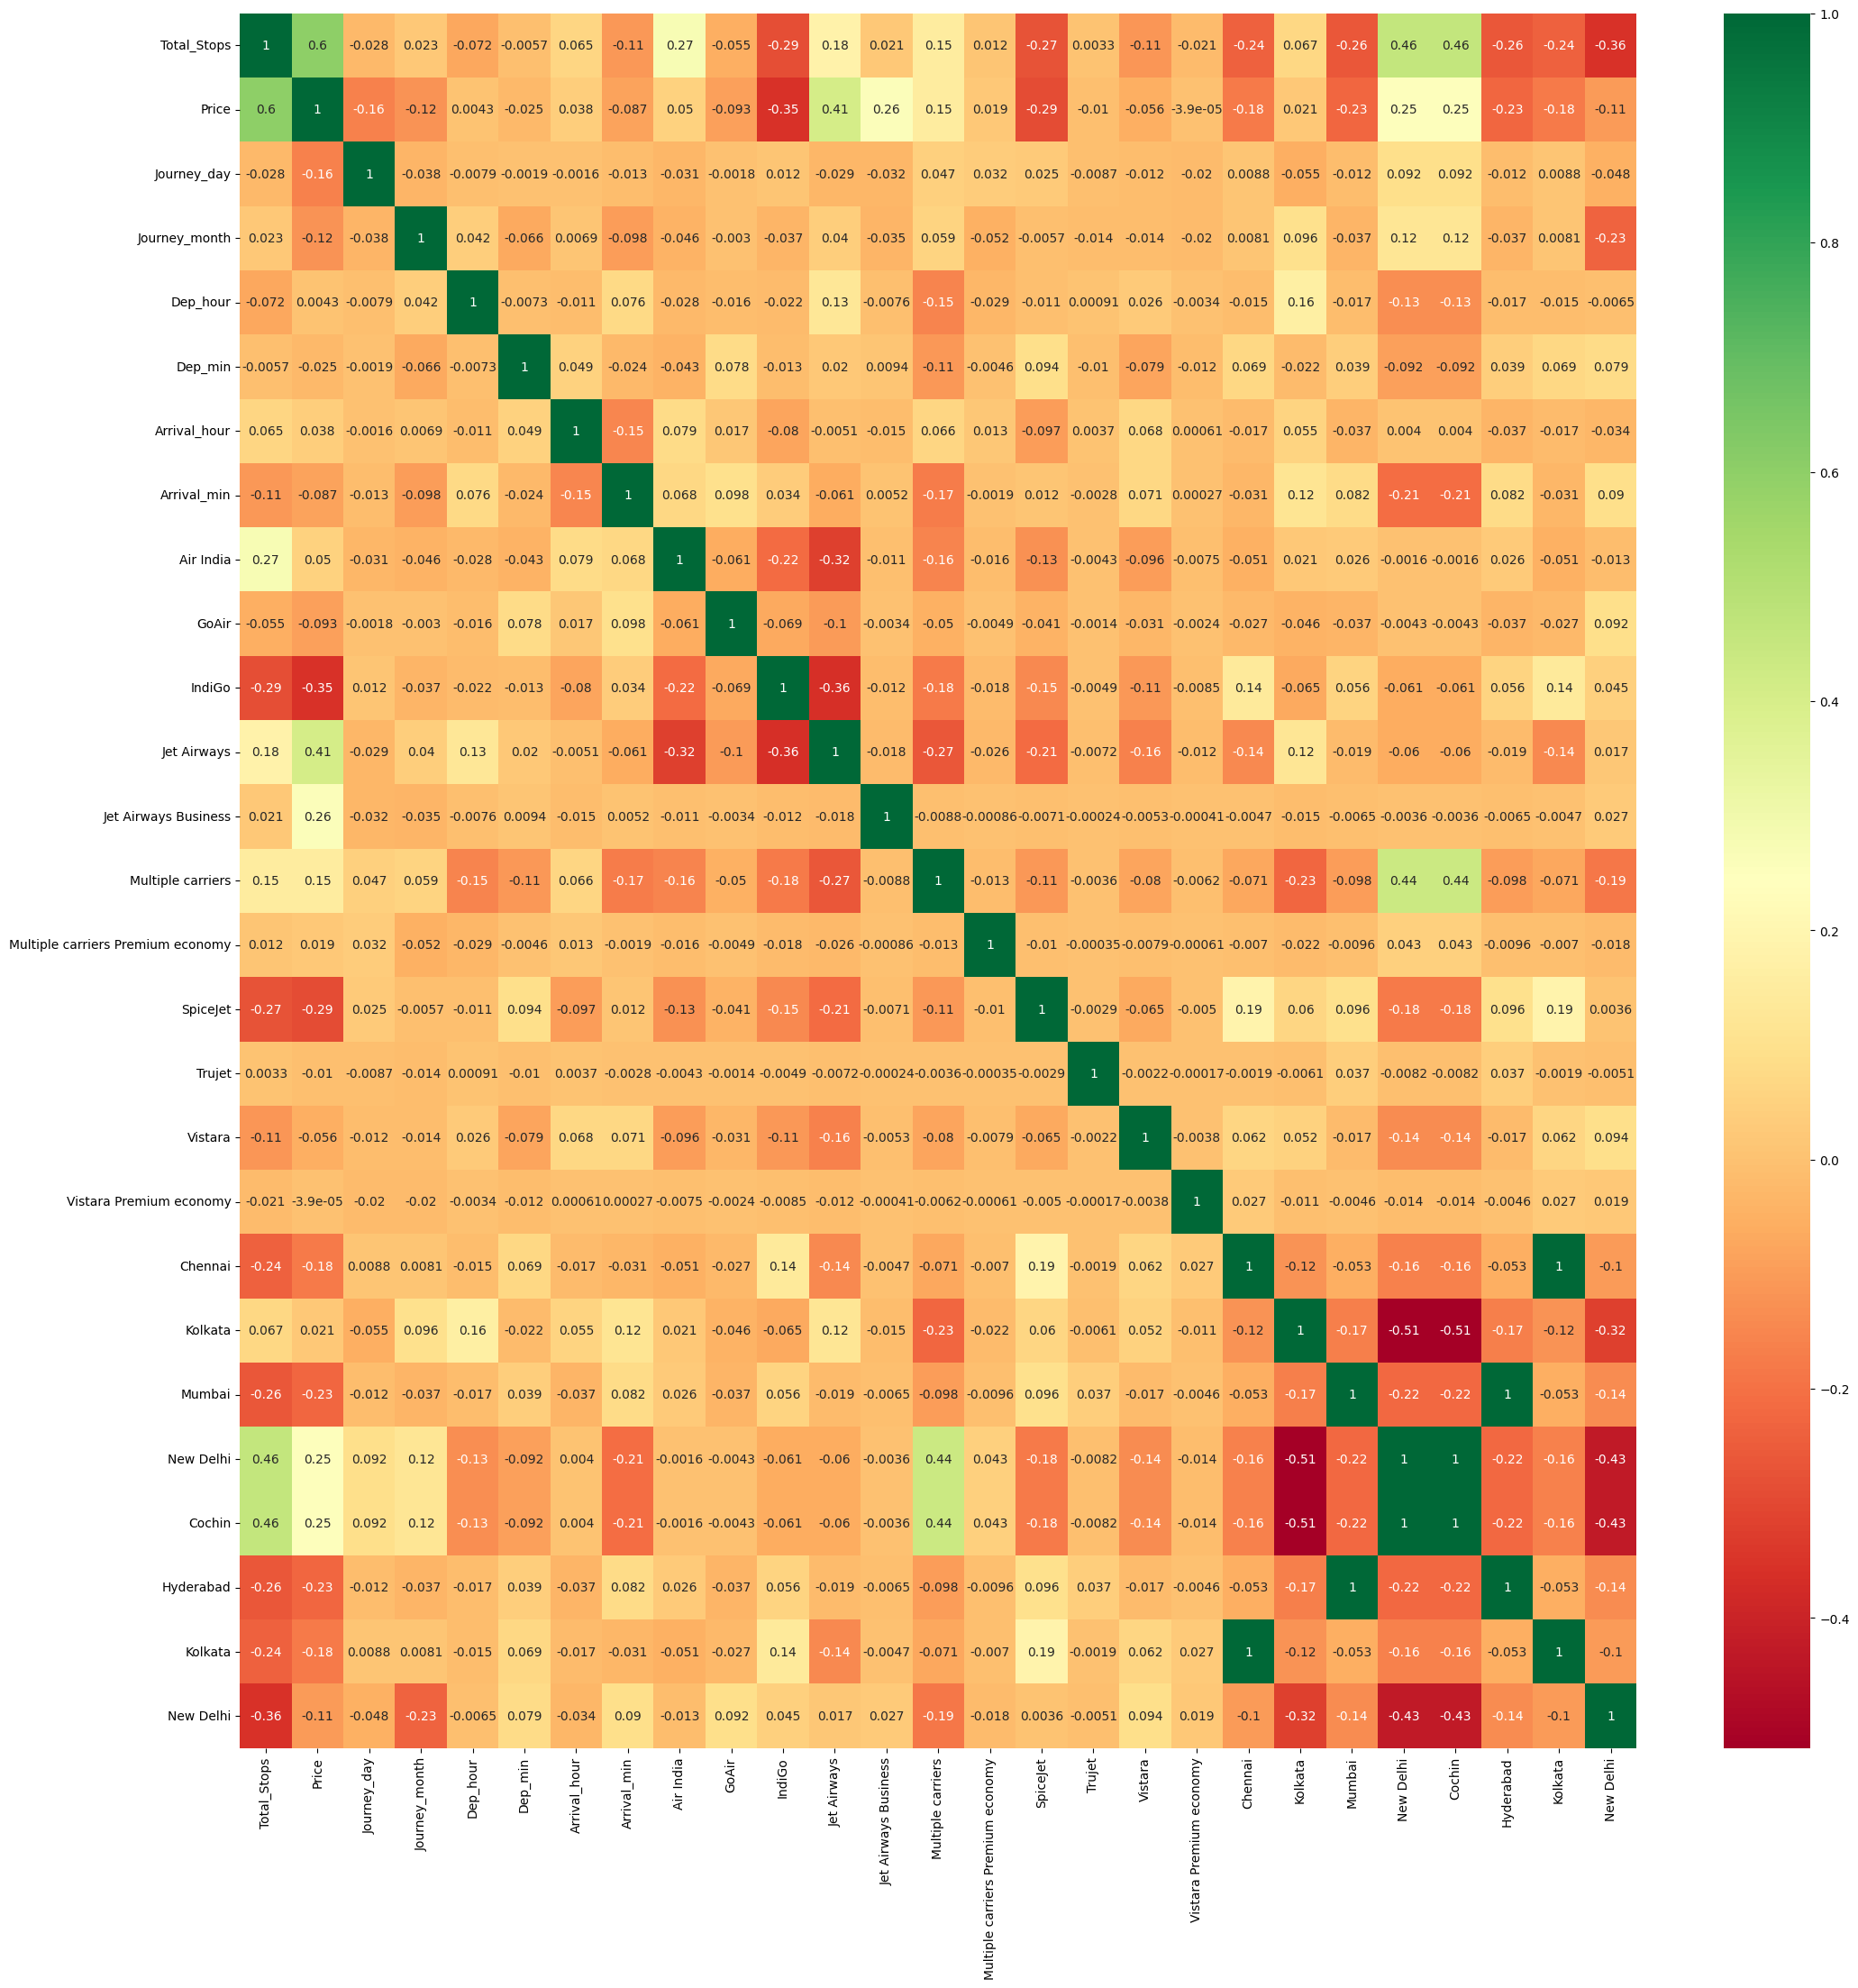

In [ ]:
# correaltion matrix
plt.figure(figsize=(25,25))
sns.heatmap(fight_df.corr(),annot = True, cmap = "RdYlGn")

In [ ]:
# Removing correlated features
Threshold=0.8
# find and remove correlated features
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

correlation(X,Threshold)

{'Cochin', 'Hyderabad', 'Kolkata'}

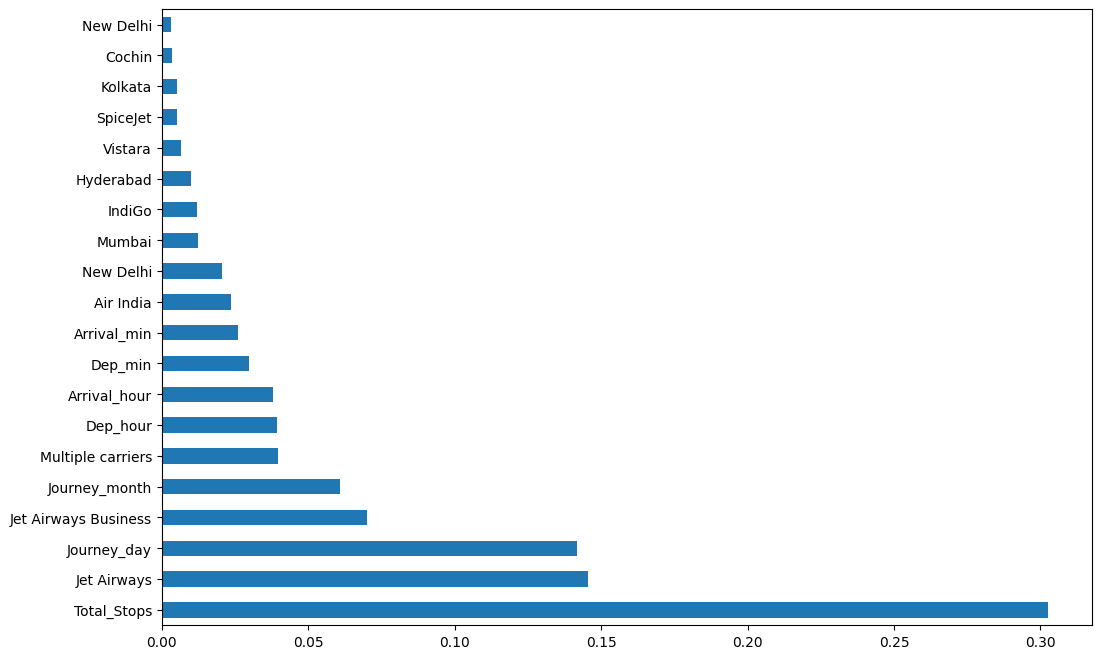

In [ ]:
# Feature Selection

# Important feature using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, Y)

#plot graph of feature importances for better visualization
plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()


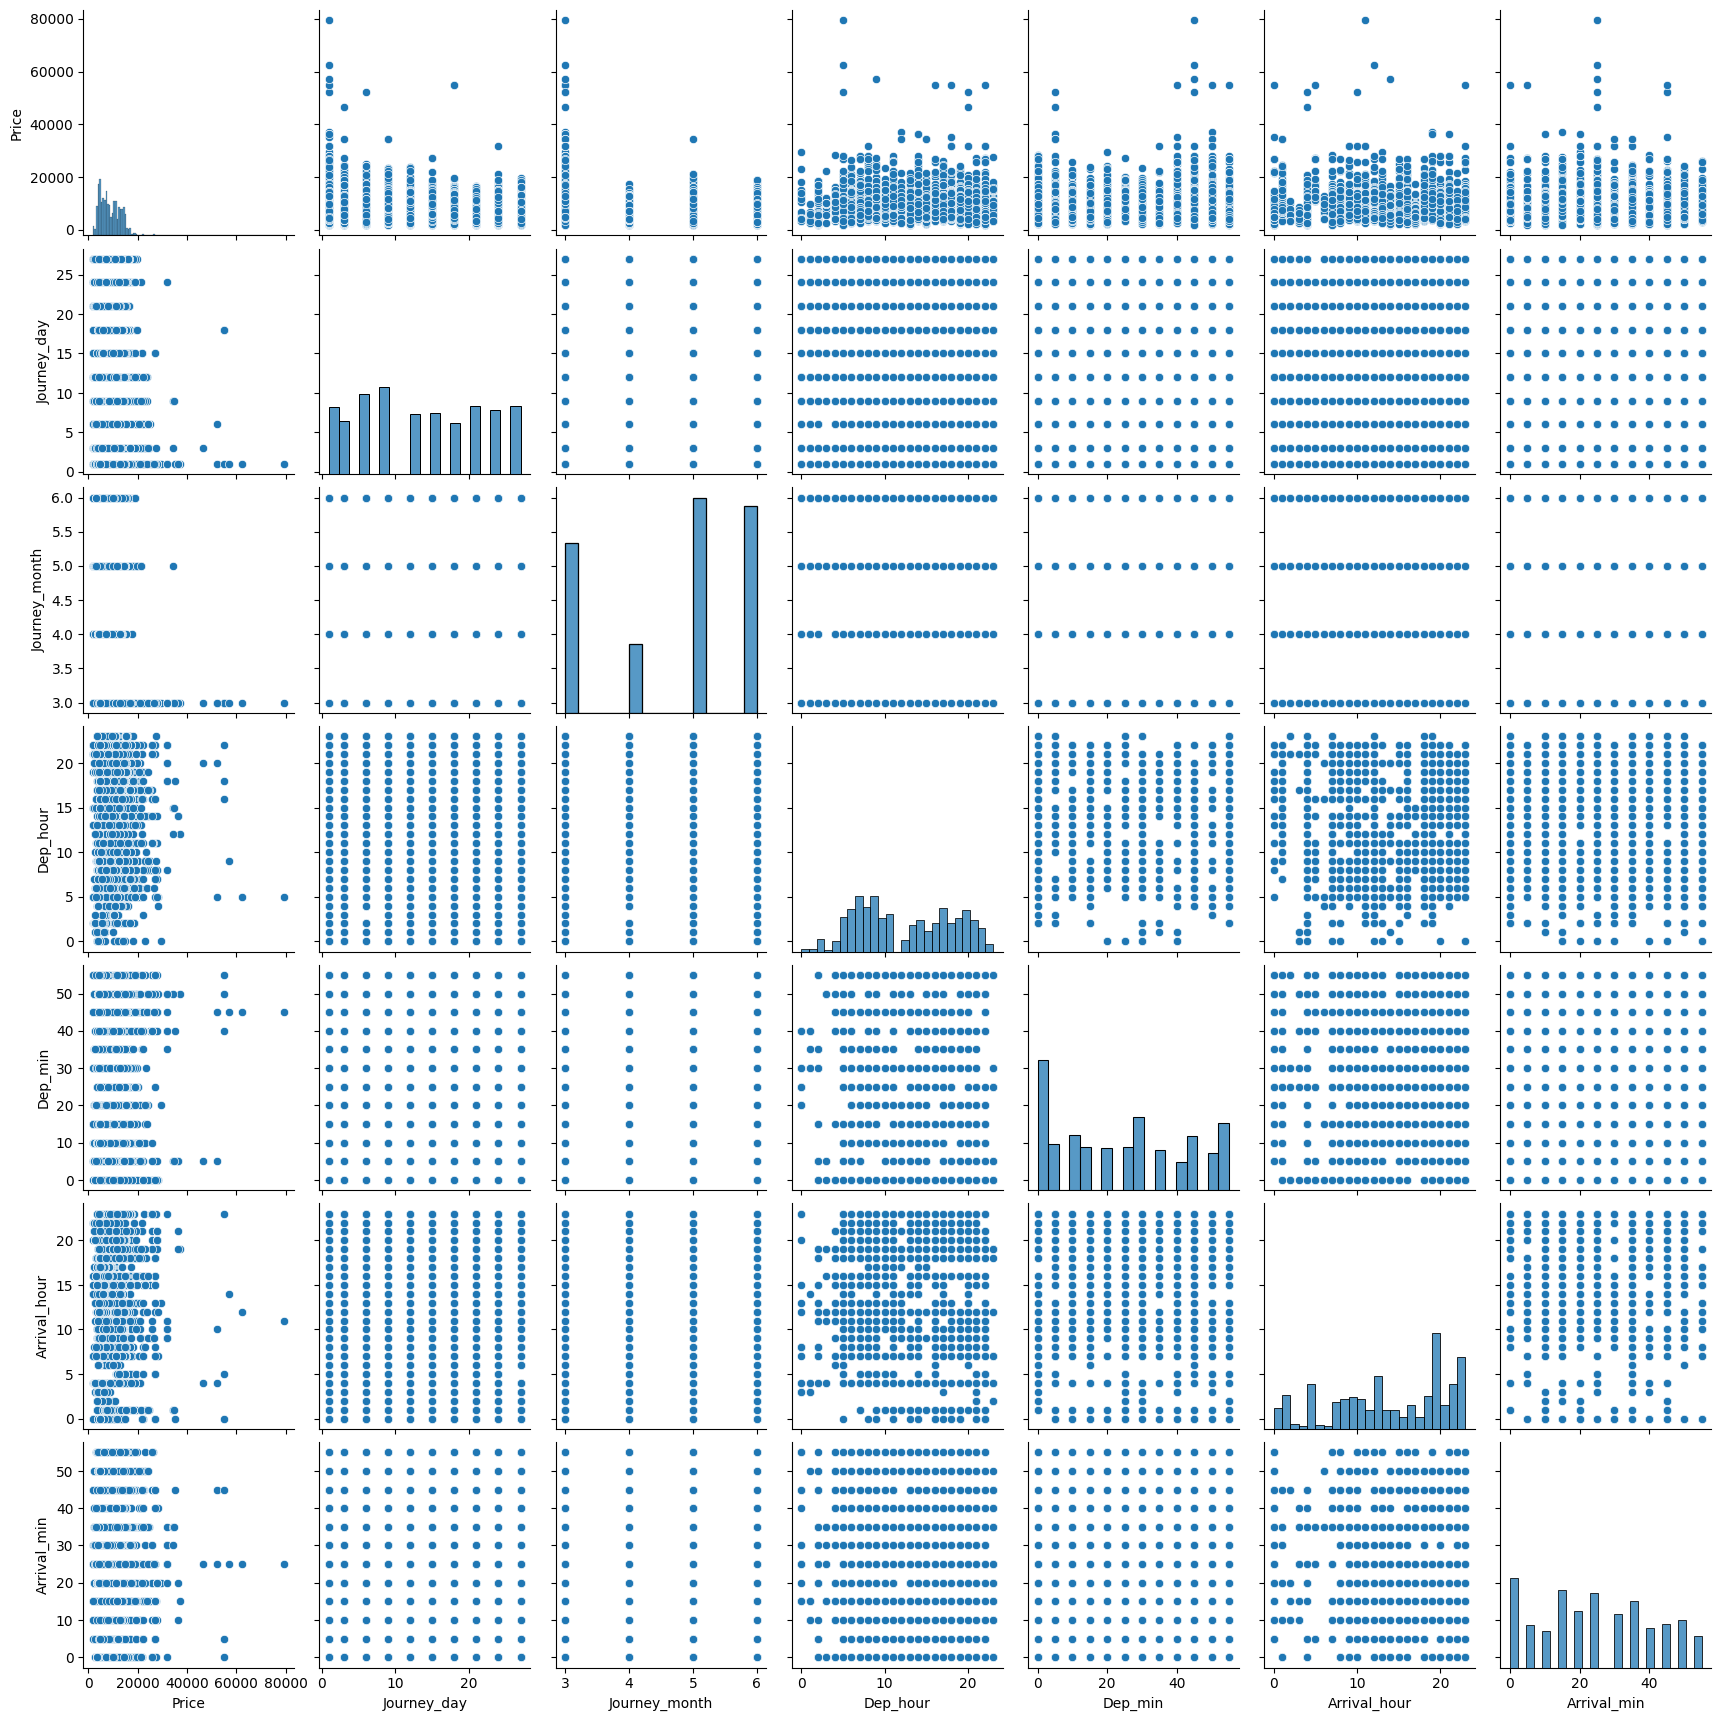

In [ ]:
sns.pairplot(flight_df)

In [ ]:
# Making the same changes in test data 

test=pd.read_excel('Test_set.xlsx')
test.isnull().sum()


test['Source'] = test['Source'].replace({'Delhi': 'New Delhi'})
test['Destination'] = test['Destination'].replace({'Delhi': 'New Delhi'})

FileNotFoundError: ignored

In [ ]:
# Date_of_Journey
test["Journey_day"] = pd.to_datetime(test.Date_of_Journey, format="%d/%m/%Y").dt.day
test["Journey_month"] = pd.to_datetime(test["Date_of_Journey"], format = "%d/%m/%Y").dt.month
test.drop(["Date_of_Journey"], axis = 1, inplace = True)

# Dep_Time
test["Dep_hour"] = pd.to_datetime(test["Dep_Time"]).dt.hour
test["Dep_min"] = pd.to_datetime(test["Dep_Time"]).dt.minute
test.drop(["Dep_Time"], axis = 1, inplace = True)

# Arrival_Time
test["Arrival_hour"] = pd.to_datetime(test.Arrival_Time).dt.hour
test["Arrival_min"] = pd.to_datetime(test.Arrival_Time).dt.minute
test.drop(["Arrival_Time"], axis = 1, inplace = True)


In [ ]:
# Duration
duration=list(test['Duration']) # convertion duration coulmn to list to sepearte hours and min

for i in range(len(duration)):
    if duration[i].split()!=2:
        if 'h' in duration[i]:
            duration[i]= duration[i].strip()+' 0m'
            
        else:
            duration[i]= '0h '+ duration[i]

duration_hr=[]
duration_min=[]

for i in range(len(duration)):
    duration_hr.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_min.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

test.drop(["Duration"], axis = 1, inplace = True)

In [ ]:


# one-hot encoding of categorical variables
print("Airline")
print("-"*75)
print(test["Airline"].value_counts())
Airline = pd.get_dummies(test["Airline"], drop_first= True)

print(test["Source"].value_counts())
Source = pd.get_dummies(test["Source"], drop_first= True)


print(test["Destination"].value_counts())
Destination = pd.get_dummies(test["Destination"], drop_first = True)

# Replacing Total_Stops
test.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

test.drop(['Airline','Source','Destination','Route'],axis=1,inplace=True)


In [ ]:

test = pd.concat([test, Airline, Source, Destination], axis = 1)

test.drop(['Additional_Info'],axis=1,inplace=True)

Regression modelling
I am going to apply 10 regression models and judge them on the basis of RMSE value since the value is not much influenced by outliers.
The models are:
* LinearRegression
* LGBM Regressor
* XGBoost Regressor
* CatBoost Regressor
* Stochastic Gradient Descent Regression
* Kernel Ridge Regression
* Support Vector Machine
* Random Forest Regressor
* Gradient Boosting Regression
* Bayesian Ridge Regression

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)


In [ ]:

# importing ML models
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

from sklearn.ensemble import GradientBoostingRegressor

from sklearn.linear_model import BayesianRidge

from sklearn.linear_model import LinearRegression

from sklearn.linear_model import ElasticNet

from xgboost.sklearn import XGBRegressor

from sklearn.kernel_ridge import KernelRidge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [ ]:
models = [['LinearRegression : ', LinearRegression()],
          ['ElasticNet :', ElasticNet()],
          ['DecisionTreeRegressor : ', DecisionTreeRegressor()],
          ['RandomForestRegressor : ', RandomForestRegressor()],
          ['SVR : ', SVR()],
          ['GradientBoostingRegressor : ', GradientBoostingRegressor()],
          ['KNeighborsRegressor : ', KNeighborsRegressor()],
          ['BayesianRidge : ', BayesianRidge()],
          ['KernalRidge: ', KernelRidge()]]

In [ ]:
rmse_score=[]
for name,model in models:
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    rmse_score.append([name,np.sqrt(mean_squared_error(y_test, predictions))])
    print(name, (np.sqrt(mean_squared_error(y_test, predictions)))) 


LinearRegression :  3116.253394200967
ElasticNet : 3900.004374416113
DecisionTreeRegressor :  2588.160418451681
RandomForestRegressor :  2213.106799862847
SVR :  4989.647572744124
GradientBoostingRegressor :  2470.7816876557904
KNeighborsRegressor :  3652.2017098225515
BayesianRidge :  3118.295980596913
KernalRidge:  3156.111391772343


In [ ]:

best_model=DecisionTreeRegressor()
best_model.fit(X_train, y_train)
prediction = best_model.predict(X_train)

best_model.score(X_train, y_train),best_model.score(X_test, y_test)

(0.9731449702323002, 0.7266195295512344)

In [ ]:

rmse_score=sorted(rmse_score,key=lambda x: x[1])
rmse_score
df=pd.DataFrame(rmse_score,columns=['model','rmse_score'])
df.head(3)


Above 3 models have the lowest RMSE. Hence, we will be considering them for hyperparameter tuning

HyperParameter Tuning

* GridSearchCV -> computationally expensive
* RandomGridSearchCV-> Faster 


In [ ]:
model_para={
    'RandomForestRegressor':{
        'model':RandomForestRegressor(),
        'parameters':{
            'n_estimators' : [300, 500, 700, 1000, 2100],
            'max_depth' : [3, 5, 7, 9, 11, 13, 15],
            'max_features' : ["auto", "sqrt", "log2"],
            'min_samples_split' : [2, 4, 6, 8]
        }
    },
    
    'GradientBoostingRegressor':{
        'model':GradientBoostingRegressor(),
        'parameters':{      
            'learning_rate' : [0.05, 0.08, 0.1, 0.20, 0.25, 0.30],
            'n_estimators' : [300, 500, 700, 1000, 2100],
            'criterion' : ['friedman_mse', 'mse']
        }
    
        
    },
    
    'DecisionTreeRegressor':{
        'model':DecisionTreeRegressor(),
        'parameters':{
            'splitter':["best","random"],
            'max_depth' : [3, 5, 7, 9, 11, 13, 15],
            'max_features' : ["auto", "sqrt", "log2"],
            'min_samples_split' : [2, 4, 6, 8]                 
        }
    }
    

}


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

score = []

for name, mp in model_para.items() :
    rs = RandomizedSearchCV(estimator = mp['model'], param_distributions = mp['parameters'], cv = 5, n_jobs=-1,verbose=2)
    rs.fit(X_train, y_train)
    score.append({
        'model': name,
        'score' : rs.best_score_,
        'params' : rs.best_params_
    })


Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_gb.py", line 420, in fit
    self._validate_params()
  File "/usr/local/lib/python3.9/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.9/dist-packages/sklearn/utils/_param_v

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


In [ ]:

df=pd.DataFrame(score)
df

,model,score,params
0,RandomForestRegressor,0.827200,"{'n_estimators': 300, 'min_samples_split': 6, ..."
1,GradientBoostingRegressor,0.836759,"{'n_estimators': 1000, 'learning_rate': 0.25, ..."
2,DecisionTreeRegressor,0.793220,"{'splitter': 'best', 'min_samples_split': 8, '..."


In [ ]:
df['params'][1]

{'n_estimators': 1000, 'learning_rate': 0.25, 'criterion': 'friedman_mse'}

In [ ]:
best_model=GradientBoostingRegressor(n_estimators= 1000, learning_rate= 0.25, criterion= 'friedman_mse')
best_model.fit(X_train, y_train)
prediction = best_model.predict(X_test)

best_model.score(X_train, y_train),best_model.score(X_test, y_test)

(0.9011724471585373, 0.8160568915328984)

In [ ]:
np.sqrt(mean_squared_error(y_test, prediction))

2100.860196900558

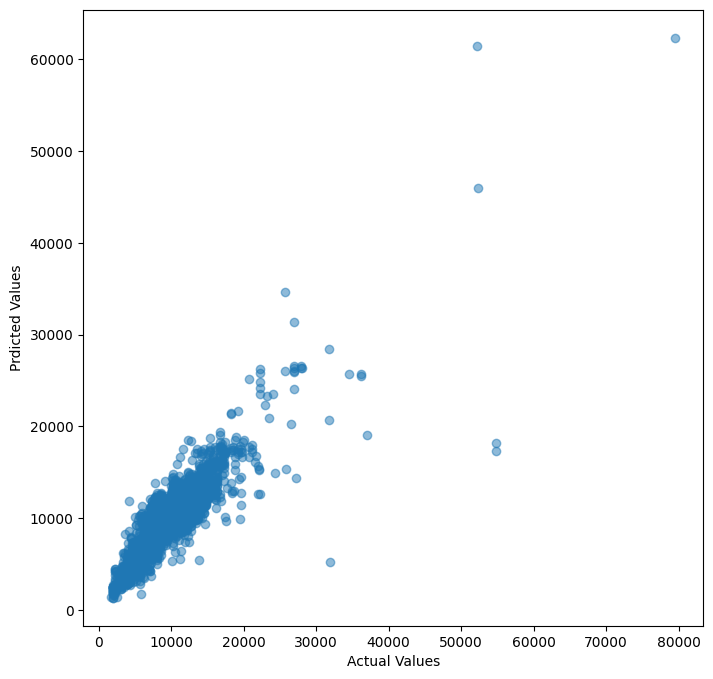

In [ ]:

plt.figure(figsize = (8,8))
plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel("Actual Values")
plt.ylabel("Prdicted Values")
plt.show()
